In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('heart.csv')

In [4]:
df=df.drop(['oldpeak','slp','thall'],axis=1)

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


In [6]:
df.shape

(303, 11)

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
caa         0
output      0
dtype: int64

In [8]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.276326,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.118261,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.181053,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.101389,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.070511,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.137979,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.072042,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.213177,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.115739,-0.436757
caa,0.276326,0.118261,-0.181053,0.101389,0.070511,0.137979,-0.072042,-0.213177,0.115739,1.000000,-0.391724


<AxesSubplot:>

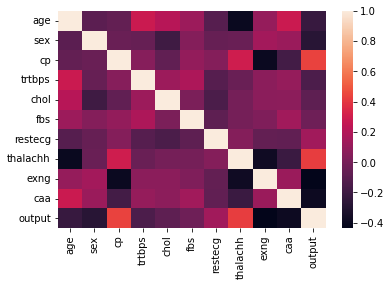

In [9]:
sb.heatmap(df.corr())

<AxesSubplot:title={'center':'age distrubution'}, xlabel='age', ylabel='count'>

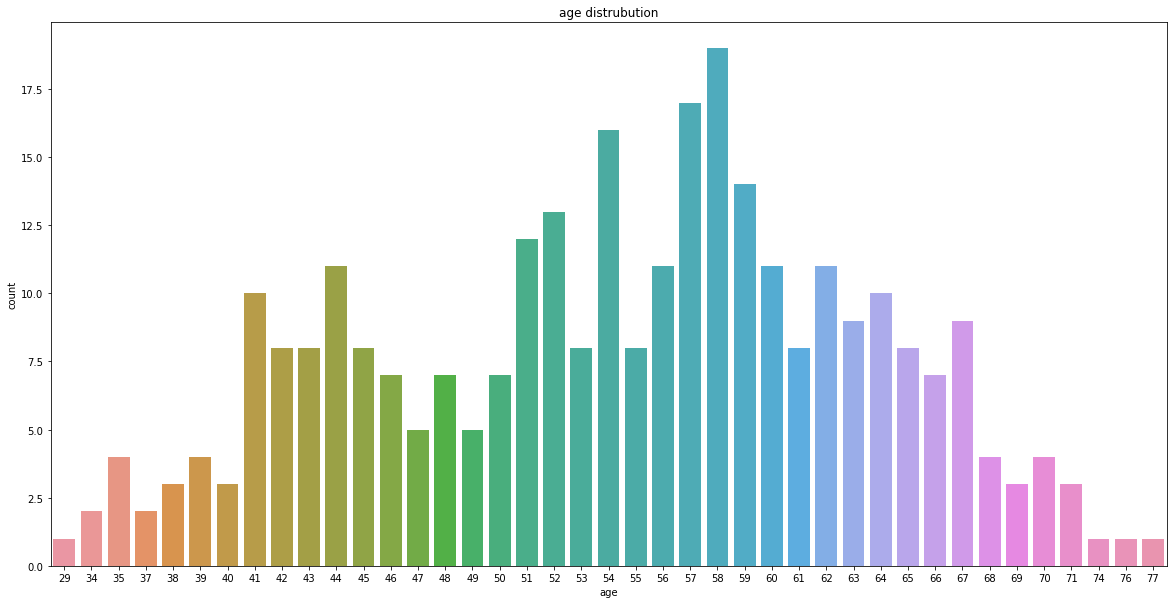

In [10]:
plt.figure(figsize=(20,10))
plt.title('age distrubution')
plt.xlabel('age')
sb.countplot(x='age',data=df)

<AxesSubplot:title={'center':'sex of patients 0=female 1=male'}, xlabel='sex', ylabel='count'>

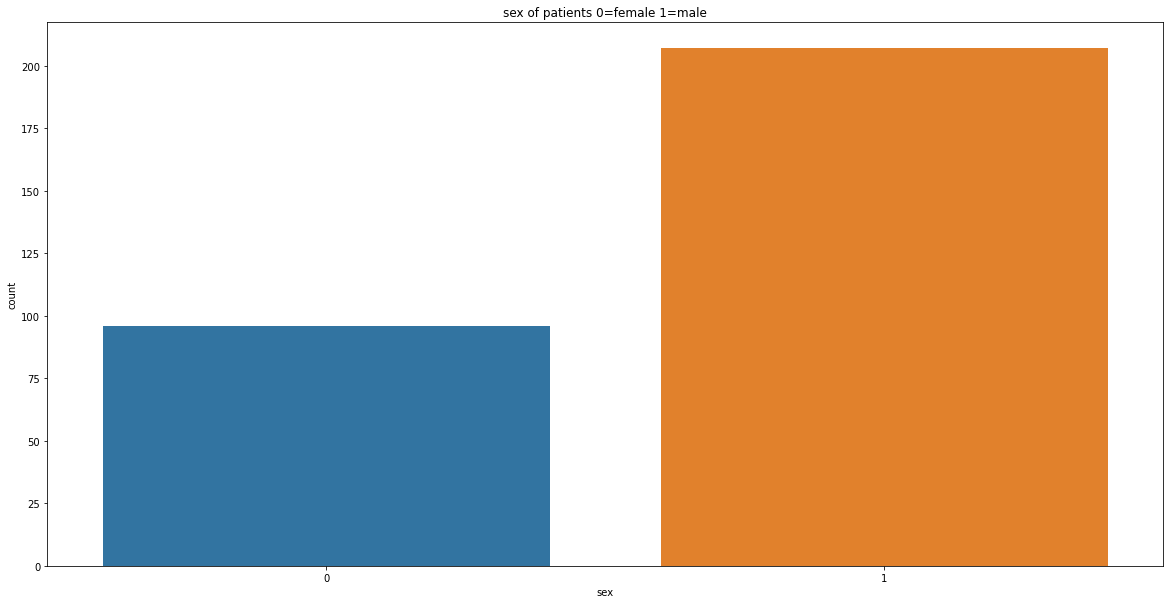

In [11]:
plt.figure(figsize=(20,10))
plt.title("sex of patients 0=female 1=male")
sb.countplot(x='sex',data=df)

In [12]:
#chest pain patients
cp_data=df['cp'].value_counts().reset_index()
cp_data['index'][3]='asympotomatic'
cp_data['index'][2]='non-anginal'
cp_data['index'][1]='Atypoical Angina'
cp_data['index'][0]='typical Angina'
cp_data

,index,cp
0,typical Angina,143
1,Atypoical Angina,87
2,non-anginal,50
3,asympotomatic,23


<AxesSubplot:title={'center':'chest pain'}, xlabel='index', ylabel='cp'>

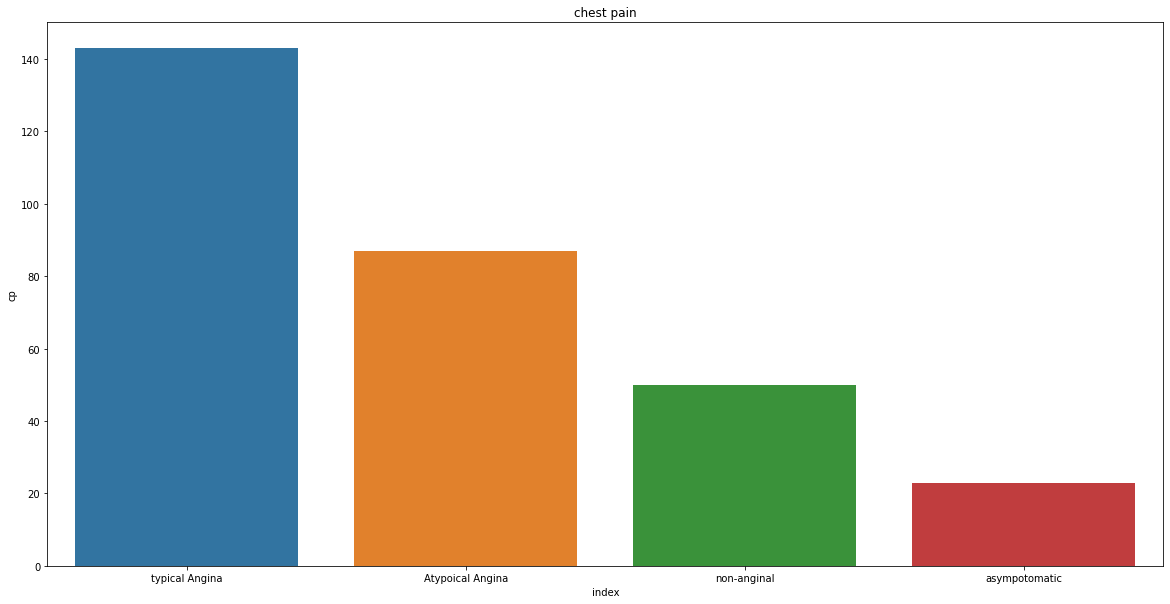

In [13]:
plt.figure(figsize=(20,10))
plt.title("chest pain")
sb.barplot(x=cp_data['index'],y=cp_data['cp'])

In [14]:
ecg_data=df['restecg'].value_counts().reset_index()
ecg_data['index'][0]='Normal'
ecg_data['index'][1]='ST-T wave abnormality'
ecg_data['index'][2]='verticular hypertropy'
ecg_data


,index,restecg
0,Normal,152
1,ST-T wave abnormality,147
2,verticular hypertropy,4


<AxesSubplot:title={'center':'ecg'}, xlabel='index', ylabel='restecg'>

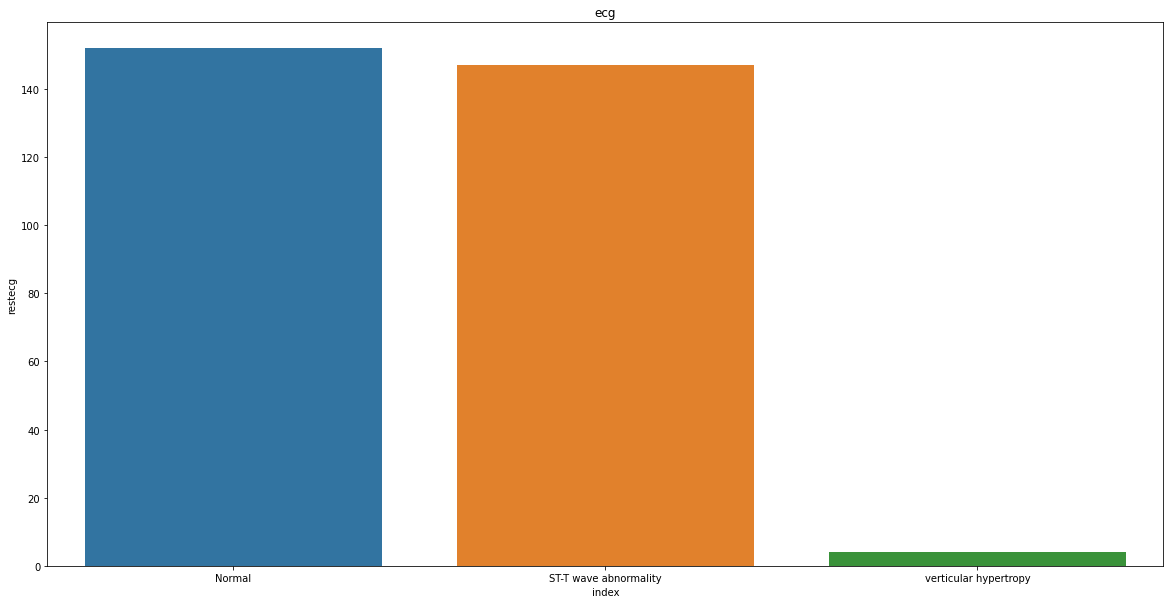

In [15]:
plt.figure(figsize=(20,10))
plt.title("ecg")
sb.barplot(x=ecg_data['index'],y=ecg_data['restecg'])

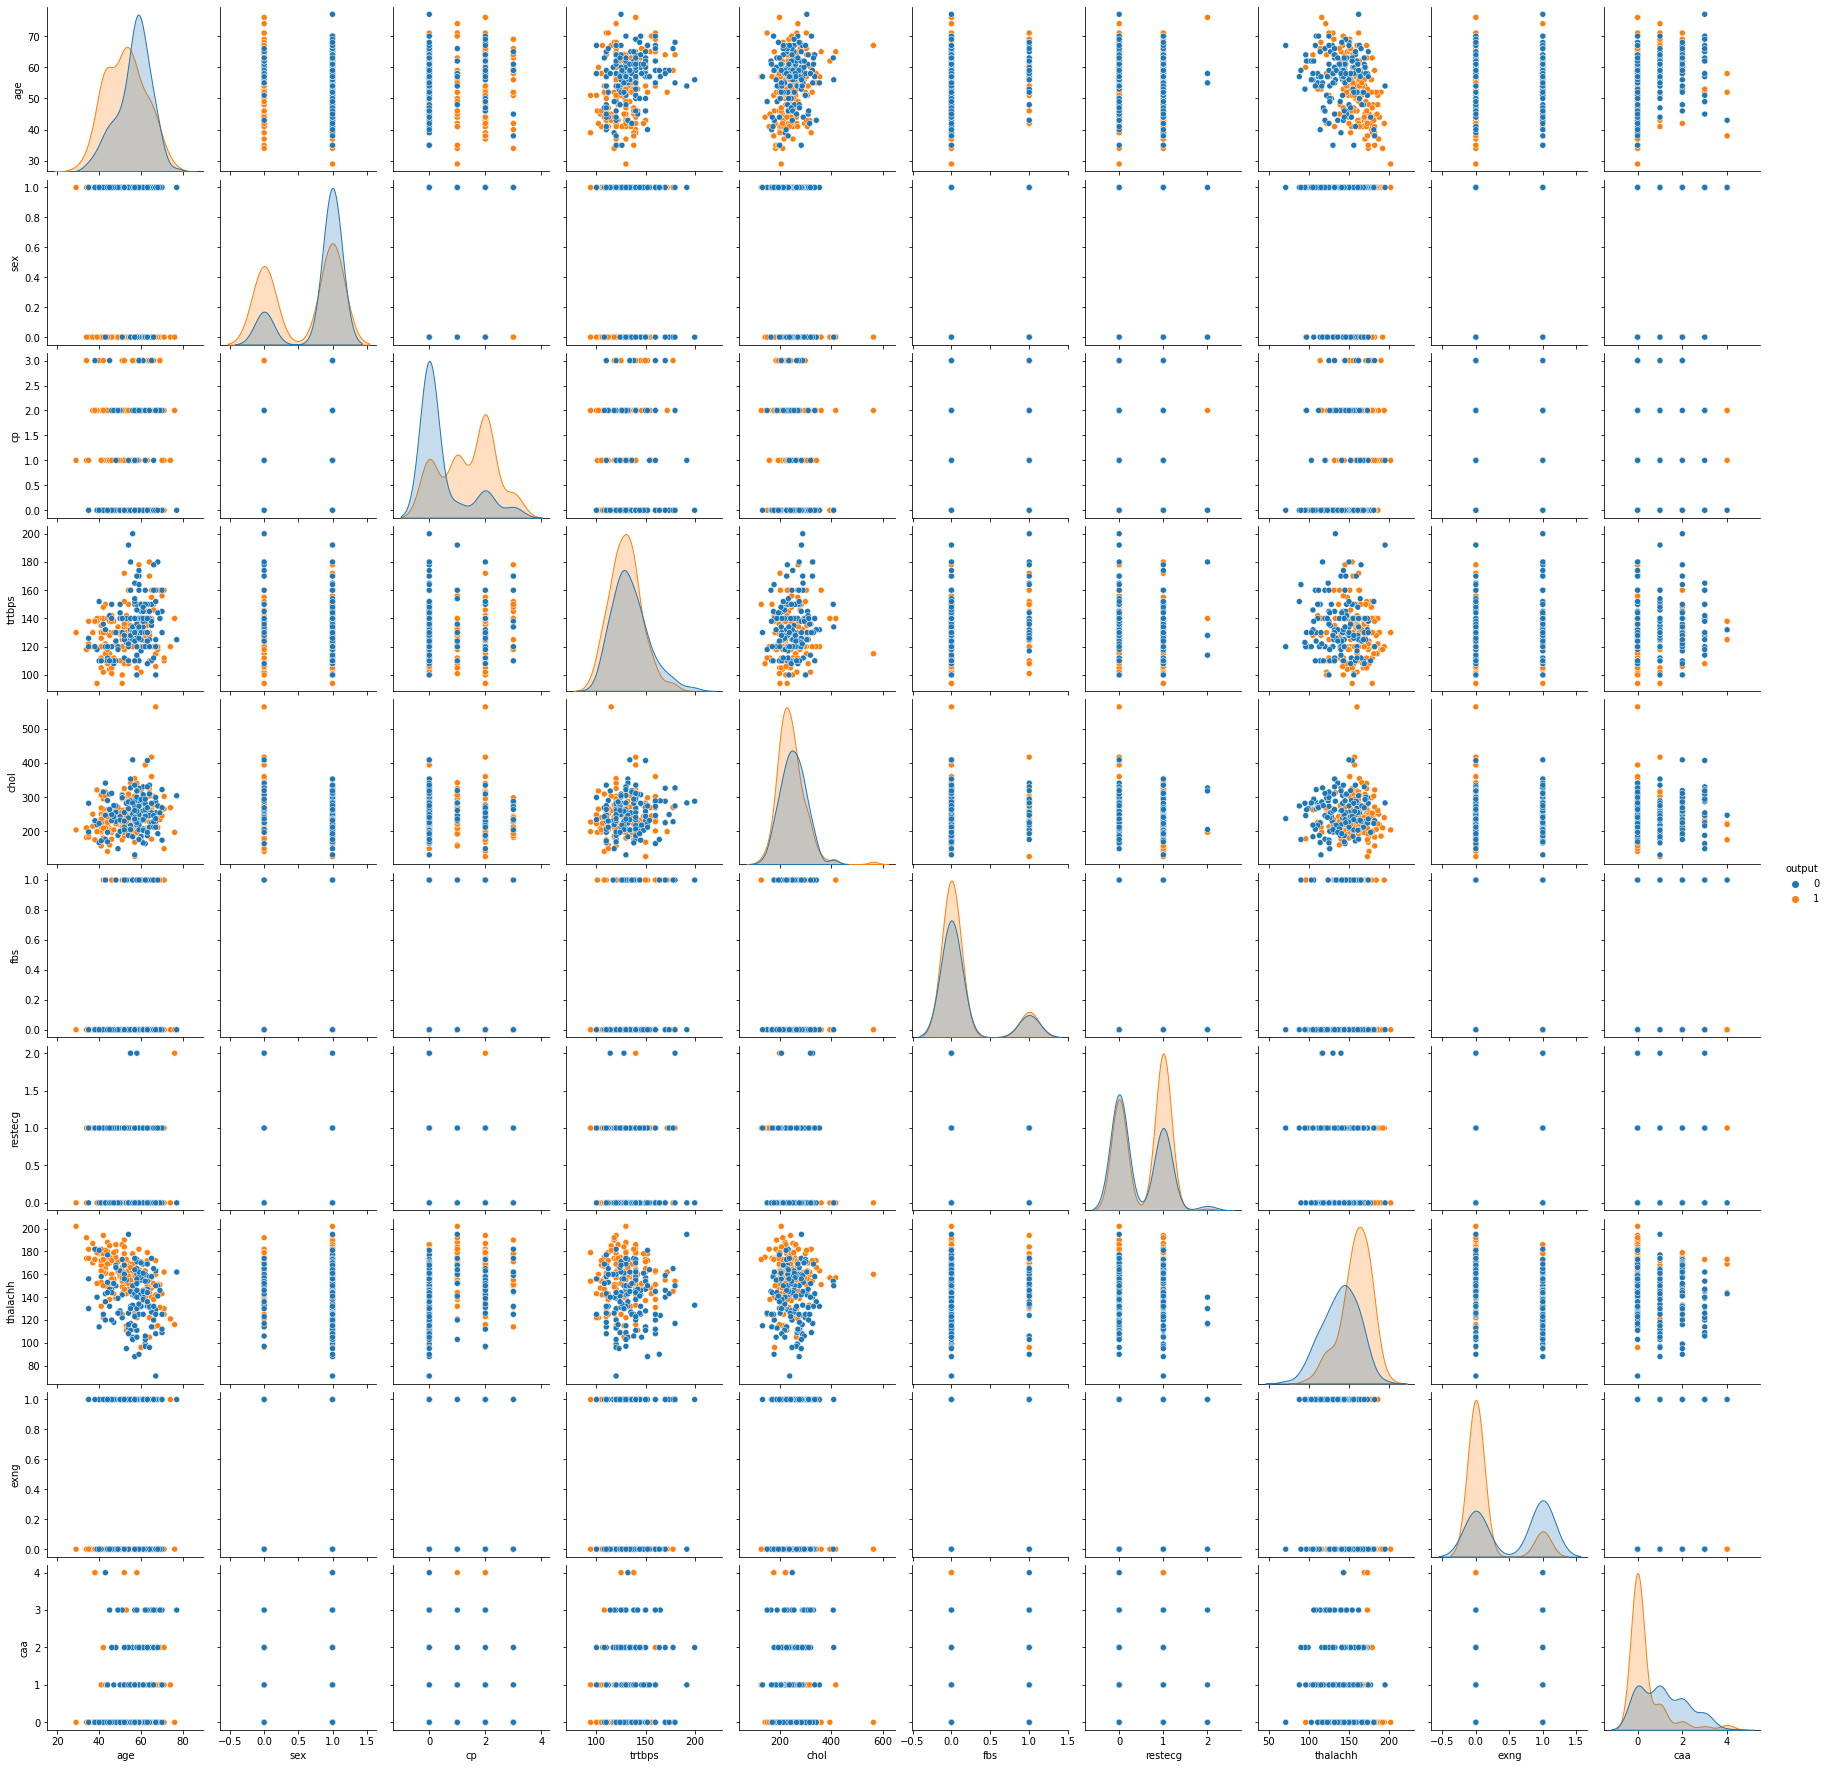

In [16]:
sb.pairplot(df,hue='output',data=df)

E:\AC\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\AC\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='thalachh', ylabel='Density'>

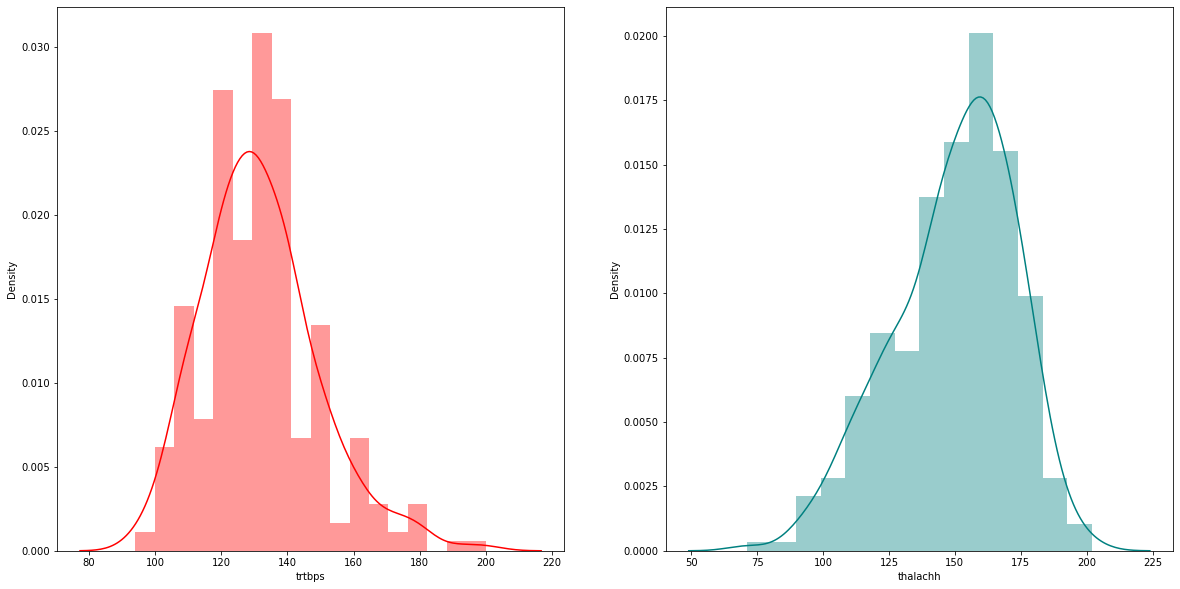

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sb.distplot(df['trtbps'],kde=True,color='red')
plt.subplot(1,2,2)
sb.distplot(df['thalachh'],kde=True,color='teal')

E:\AC\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chol', ylabel='Density'>

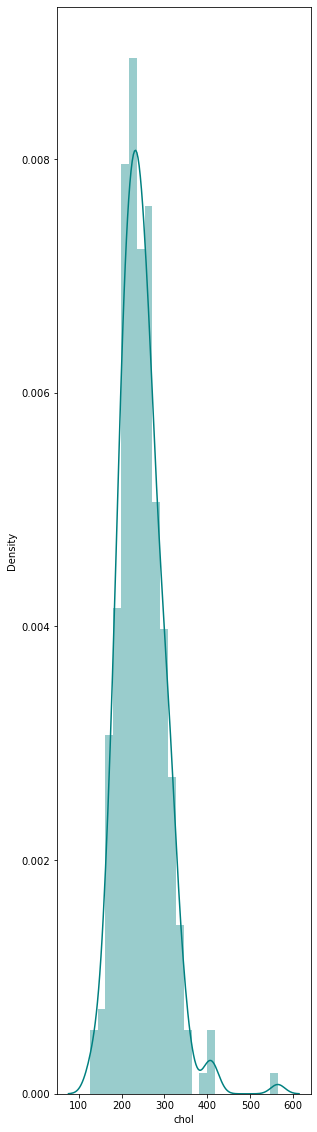

In [18]:
plt.figure(figsize=(10,20))
plt.subplot(1,2,2)
sb.distplot(df['chol'],kde=True,color='teal')

In [19]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()

In [22]:
scaler.fit(df)

StandardScaler()

In [23]:
df=scaler.transform(df)

In [24]:
df=pd.DataFrame(df,columns=['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','caa','output'])

In [25]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,-0.714429,0.914529
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,-0.714429,0.914529
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,-0.714429,0.914529
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.714429,0.914529
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.714429,0.914529


In [26]:
x=df.iloc[:,:-1]
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,-0.714429
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,-0.714429
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,-0.714429
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.714429
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.714429
...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.714429
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,-0.714429
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,1.244593
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.265082


In [27]:
y=df.iloc[:,-1:]
y

,output
0,0.914529
1,0.914529
2,0.914529
3,0.914529
4,0.914529
...,...
298,-1.093459
299,-1.093459
300,-1.093459
301,-1.093459


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
L=LabelEncoder()
ency=L.fit_transform(y_train)


E:\AC\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
log=LogisticRegression()

In [33]:
log.fit(x_train,ency)

LogisticRegression()

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [35]:
encoded_ytest=L.fit_transform(y_test)

E:\AC\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
y_pred1=log.predict(x_test)
lf_mat=confusion_matrix(encoded_ytest,y_pred1)

lf_acc=accuracy_score(encoded_ytest,y_pred1)
lf_mat

array([[35,  9],
       [ 4, 43]], dtype=int64)

In [37]:
print(lf_acc*100,'%')

85.71428571428571 %


In [38]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()

In [39]:
tree.fit(x_train,ency)

DecisionTreeClassifier()

In [40]:
ypred2=tree.predict(x_test)

In [41]:
encoded_ytest=L.fit_transform(y_test)

E:\AC\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
lf_mat=confusion_matrix(encoded_ytest,ypred2)

lf_acc=accuracy_score(encoded_ytest,ypred2)
lf_mat

array([[27, 17],
       [11, 36]], dtype=int64)

In [43]:
print(lf_acc*100,'%')

69.23076923076923 %


In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
err_rate=[]
for i in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,ency)
    pred=knn.predict(x_test)
    err_rate.append(np.mean(pred!=encoded_ytest))

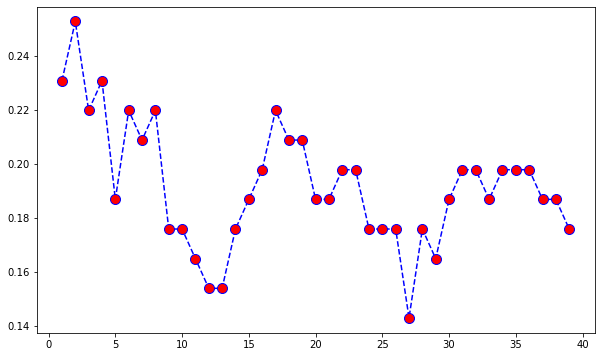

In [46]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),err_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.show()

In [47]:
knn= KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,ency)
ypred3=knn.predict(x_test)

In [48]:
lf_mat=confusion_matrix(encoded_ytest,ypred3)

lf_acc=accuracy_score(encoded_ytest,ypred3)
lf_mat

array([[35,  9],
       [ 5, 42]], dtype=int64)

In [49]:
print(lf_acc*100)

84.61538461538461


In [50]:
from sklearn import svm
svm=svm.SVC()

In [51]:
svm.fit(x_train,ency)

SVC()

In [52]:
ypred4=svm.predict(x_test)

In [53]:
lf_mat=confusion_matrix(encoded_ytest,ypred4)

lf_acc=accuracy_score(encoded_ytest,ypred4)
lf_mat

array([[34, 10],
       [ 8, 39]], dtype=int64)

In [54]:
print(lf_acc*100)

80.21978021978022
